# Pulsar Folding Code

In [1]:
#The data is being imported in this step.
import pandas as pd
import numpy as np
column_names = ["Time Sample" , "Power"]
d1 = pd.read_csv('B1133_ti.out', sep=' ', header = None, names = column_names, dtype=np.float64)
print(d1)

      Time Sample    Power
0       13.119214  1995.83
1       13.119226  2004.89
2       13.119237  2010.47
3       13.119249  2005.98
4       13.119261  2004.09
...           ...      ...
7736    13.209345  1986.18
7737    13.209356  1985.32
7738    13.209369  1979.06
7739    13.209380  1977.38
7740    13.209392  1984.09

[7741 rows x 2 columns]


In [2]:
#Calculating the Time series.
ts = []
for i in range (1, 7742):
    ts.append(i)

In [4]:
#Calculating the number of rotations of Pulsar.
p = 1187.88119448 # in ms
t = 41.94304  # in ms
ratio = t/p 
rotation = d1.apply (lambda row : row [2]*ratio, axis = 1)
d1['Number of Rotations'] = rotation
print (d1)

      Time Sample    Power  Time Series  Number of Rotations
0       13.119214  1995.83            1             0.035309
1       13.119226  2004.89            2             0.070618
2       13.119237  2010.47            3             0.105927
3       13.119249  2005.98            4             0.141236
4       13.119261  2004.09            5             0.176546
...           ...      ...          ...                  ...
7736    13.209345  1986.18         7737           273.186664
7737    13.209356  1985.32         7738           273.221973
7738    13.209369  1979.06         7739           273.257282
7739    13.209380  1977.38         7740           273.292591
7740    13.209392  1984.09         7741           273.327900

[7741 rows x 4 columns]


Pulsar Phase Calculation Formula:
$$
\frac{\text{Time Sample Number} \times t}{p} - \text{INT} \left[\frac{\text{Time Sample Number} \times t}{p} \right] = \text{Pulsar Rotational Phase}
$$

In [3]:
#Adding the time series to the data.
d1["Time Series"] = ts
print (d1)

      Time Sample    Power  Time Series
0       13.119214  1995.83            1
1       13.119226  2004.89            2
2       13.119237  2010.47            3
3       13.119249  2005.98            4
4       13.119261  2004.09            5
...           ...      ...          ...
7736    13.209345  1986.18         7737
7737    13.209356  1985.32         7738
7738    13.209369  1979.06         7739
7739    13.209380  1977.38         7740
7740    13.209392  1984.09         7741

[7741 rows x 3 columns]


In [5]:
#Calculating the Pulsar Phase.
phase = d1.apply (lambda row : (row[3] - int(row[3])), axis = 1 )
d1['Phase'] = phase
d1['Phase'] = d1['Phase']

print (d1)

      Time Sample    Power  Time Series  Number of Rotations     Phase
0       13.119214  1995.83            1             0.035309  0.035309
1       13.119226  2004.89            2             0.070618  0.070618
2       13.119237  2010.47            3             0.105927  0.105927
3       13.119249  2005.98            4             0.141236  0.141236
4       13.119261  2004.09            5             0.176546  0.176546
...           ...      ...          ...                  ...       ...
7736    13.209345  1986.18         7737           273.186664  0.186664
7737    13.209356  1985.32         7738           273.221973  0.221973
7738    13.209369  1979.06         7739           273.257282  0.257282
7739    13.209380  1977.38         7740           273.292591  0.292591
7740    13.209392  1984.09         7741           273.327900  0.327900

[7741 rows x 5 columns]


In [6]:
#Selecting just the Phase and Power Columns
powerandphase = d1.iloc[:,[4,1]]
print (powerandphase)

         Phase    Power
0     0.035309  1995.83
1     0.070618  2004.89
2     0.105927  2010.47
3     0.141236  2005.98
4     0.176546  2004.09
...        ...      ...
7736  0.186664  1986.18
7737  0.221973  1985.32
7738  0.257282  1979.06
7739  0.292591  1977.38
7740  0.327900  1984.09

[7741 rows x 2 columns]


In [7]:
#Finding the actual phases
phs = []
for i in range (0,28):
    phs.append(i/28)
print(phs)

[0.0, 0.03571428571428571, 0.07142857142857142, 0.10714285714285714, 0.14285714285714285, 0.17857142857142858, 0.21428571428571427, 0.25, 0.2857142857142857, 0.32142857142857145, 0.35714285714285715, 0.39285714285714285, 0.42857142857142855, 0.4642857142857143, 0.5, 0.5357142857142857, 0.5714285714285714, 0.6071428571428571, 0.6428571428571429, 0.6785714285714286, 0.7142857142857143, 0.75, 0.7857142857142857, 0.8214285714285714, 0.8571428571428571, 0.8928571428571429, 0.9285714285714286, 0.9642857142857143]


In [8]:
#Setting the range for each bin.
bin1 = powerandphase[(powerandphase.Phase > 0)&(powerandphase.Phase < 0.03571428571428571)]
bin2 = powerandphase[(powerandphase.Phase > 0.03571428571428571) & (powerandphase.Phase < 0.07142857142857142)]
bin3 = powerandphase[(powerandphase.Phase > 0.07142857142857142) & (powerandphase.Phase < 0.10714285714285714)]
bin4 = powerandphase[(powerandphase.Phase > 0.10714285714285714) & (powerandphase.Phase < 0.14285714285714285)]
bin5 = powerandphase[(powerandphase.Phase > 0.14285714285714285) & (powerandphase.Phase < 0.17857142857142858)]
bin6 = powerandphase[(powerandphase.Phase > 0.17857142857142858) & (powerandphase.Phase < 0.21428571428571427)]
bin7 = powerandphase[(powerandphase.Phase > 0.21428571428571427) & (powerandphase.Phase < 0.25)]
bin8 = powerandphase[(powerandphase.Phase > 0.25) & (powerandphase.Phase < 0.2857142857142857)]
bin9 = powerandphase[(powerandphase.Phase > 0.2857142857142857) & (powerandphase.Phase < 0.32142857142857145)]
bin10 = powerandphase[(powerandphase.Phase > 0.32142857142857145) & (powerandphase.Phase < 0.35714285714285715)] 
bin11 = powerandphase[(powerandphase.Phase > 0.35714285714285715) & (powerandphase.Phase < 0.39285714285714285)]
bin12 = powerandphase[(powerandphase.Phase > 0.39285714285714285) & (powerandphase.Phase < 0.42857142857142855)]
bin13 = powerandphase[(powerandphase.Phase > 0.42857142857142855) & (powerandphase.Phase < 0.4642857142857143)]
bin14 = powerandphase[(powerandphase.Phase > 0.4642857142857143) & (powerandphase.Phase < 0.5)]
bin15 = powerandphase[(powerandphase.Phase > 0.5) & (powerandphase.Phase < 0.5357142857142857)]
bin16 = powerandphase[(powerandphase.Phase > 0.5357142857142857) & (powerandphase.Phase < 0.5714285714285714)]
bin17 = powerandphase[(powerandphase.Phase > 0.5714285714285714) & (powerandphase.Phase < 0.6071428571428571)]
bin18 = powerandphase[(powerandphase.Phase > 0.6071428571428571) & (powerandphase.Phase < 0.6428571428571429)]
bin19 = powerandphase[(powerandphase.Phase > 0.6428571428571429) & (powerandphase.Phase < 0.6785714285714286)] 
bin20 = powerandphase[(powerandphase.Phase > 0.6785714285714286) & (powerandphase.Phase < 0.7142857142857143)]
bin21 = powerandphase[(powerandphase.Phase > 0.7142857142857143) & (powerandphase.Phase < 0.75)]
bin22 = powerandphase[(powerandphase.Phase > 0.75) & (powerandphase.Phase < 0.7857142857142857)]
bin23 = powerandphase[(powerandphase.Phase > 0.7857142857142857) & (powerandphase.Phase < 0.8214285714285714)]
bin24 = powerandphase[(powerandphase.Phase > 0.82142857142857147) & (powerandphase.Phase < 0.8571428571428571)]
bin25 = powerandphase[(powerandphase.Phase > 0.8571428571428571) & (powerandphase.Phase < 0.8928571428571429)]
bin26 = powerandphase[(powerandphase.Phase > 0.8928571428571429) & (powerandphase.Phase < 0.9285714285714286)]
bin27 = powerandphase[(powerandphase.Phase > 0.9285714285714286) & (powerandphase.Phase < 0.9642857142857143)]
bin28 = powerandphase[(powerandphase.Phase > 0.9642857142857143) & (powerandphase.Phase < 1 )]

In [9]:
#Creating a table with Average power and phase as columns
d2 = {'Phase' : phs,'Power' : [
bin1["Power"].mean() ,
bin2["Power"].mean(),
bin3["Power"].mean(),
bin4["Power"].mean(),
bin5["Power"].mean(),
bin6["Power"].mean(),
bin7["Power"].mean(),
bin8["Power"].mean(),
bin9["Power"].mean(),
bin10["Power"].mean(),
bin11["Power"].mean(),
bin12["Power"].mean(),
bin13["Power"].mean(),
bin14["Power"].mean(),
bin15["Power"].mean(),
bin16["Power"].mean(),
bin17["Power"].mean(),
bin18["Power"].mean(),
bin19["Power"].mean(),
bin20["Power"].mean(),
bin21["Power"].mean(),
bin22["Power"].mean(),
bin23["Power"].mean(),
bin24["Power"].mean(),
bin25["Power"].mean(),
bin26["Power"].mean(),
bin27["Power"].mean(),
bin28["Power"].mean(),]}

final = pd.DataFrame (d2)
print (final)

       Phase        Power
0   0.000000  1987.307942
1   0.035714  1991.706859
2   0.071429  2009.997148
3   0.107143  1990.713069
4   0.142857  1989.846931
5   0.178571  1991.793538
6   0.214286  1989.603849
7   0.250000  1988.994332
8   0.285714  1990.175632
9   0.321429  1989.123357
10  0.357143  1989.590072
11  0.392857  1988.609420
12  0.428571  1988.701336
13  0.464286  1988.467428
14  0.500000  1988.913007
15  0.535714  1989.354746
16  0.571429  1989.090543
17  0.607143  1989.244601
18  0.642857  1989.428989
19  0.678571  1988.191848
20  0.714286  1987.958406
21  0.750000  1987.253007
22  0.785714  1987.124420
23  0.821429  1987.130469
24  0.857143  1987.855273
25  0.892857  1987.548768
26  0.928571  1985.600580
27  0.964286  1986.882355


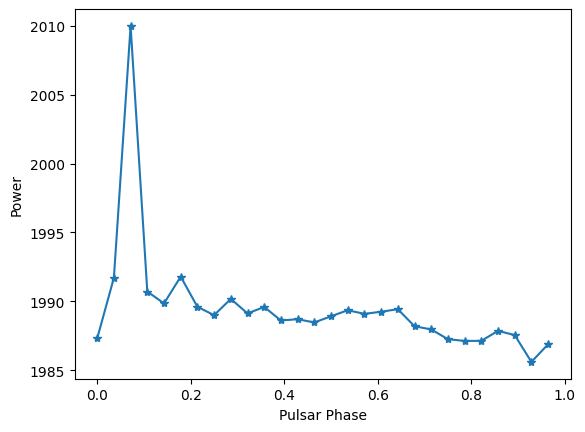

In [10]:
#Plotting the data
import matplotlib.pyplot as plt
plt.xlabel("Pulsar Phase")
plt.ylabel("Power")
plt.plot(final['Phase'] , final['Power'] , marker = '*')